# PyTorch Tutorial 07 - Linear Regression

https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## preparing data

In [2]:
# dataset creation
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=2022)

X_numpy[:5], y_numpy[:5]

(array([[-0.04684576],
        [ 1.03396388],
        [-1.64089879],
        [-0.33783233],
        [-0.11474626]]),
 array([ -1.1144095 ,   7.32405666, -16.41223989, -23.00749839,
        -22.54518225]))

In [3]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

X[:5], y[:5]

(tensor([[-0.0468],
         [ 1.0340],
         [-1.6409],
         [-0.3378],
         [-0.1147]]),
 tensor([ -1.1144,   7.3241, -16.4122, -23.0075, -22.5452]))

In [4]:
y.shape

torch.Size([100])

In [5]:
y = y.view(y.shape[0], 1)

y.shape, y[:5]

(torch.Size([100, 1]),
 tensor([[ -1.1144],
         [  7.3241],
         [-16.4122],
         [-23.0075],
         [-22.5452]]))

In [6]:
X.shape

torch.Size([100, 1])

In [7]:
n_samples, n_features = X.shape

n_samples, n_features

(100, 1)

## model

In [8]:
input_size = n_features
output_size = 1

In [9]:
model = nn.Linear(input_size, output_size)

## loss and optimizer

In [10]:
learning_rate = 0.01
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # optimizer for loss function

## training loop

In [11]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0: 
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')

epoch 10, loss = 808.2592
epoch 20, loss = 672.5703
epoch 30, loss = 578.7123
epoch 40, loss = 513.7877
epoch 50, loss = 468.8760
epoch 60, loss = 437.8075
epoch 70, loss = 416.3146
epoch 80, loss = 401.4457
epoch 90, loss = 391.1591
epoch 100, loss = 384.0424


## plot

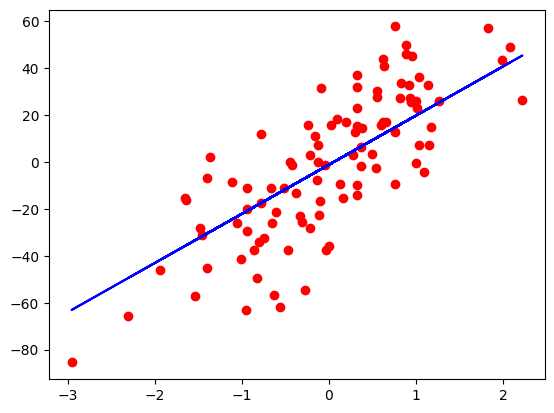

In [12]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')  # 'ro' - red dots
plt.plot(X_numpy, predicted, 'b')  # 'b' - blue (line)
plt.show()